<a href="https://colab.research.google.com/github/MURALAAYYAPPA/Deep-Learning/blob/main/Multi_class_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - accuracy: 0.2985 - loss: 3.6447 - val_accuracy: 0.5319 - val_loss: 2.7847
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.5636 - loss: 2.3924 - val_accuracy: 0.6343 - val_loss: 1.7564
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.6873 - loss: 1.5140 - val_accuracy: 0.7129 - val_loss: 1.3874
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.7512 - loss: 1.1804 - val_accuracy: 0.7374 - val_loss: 1.2140
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.8157 - loss: 0.8883 - val_accuracy: 0.7507 - val_loss: 1.1228
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.8459 - loss: 0.7039 - val_accuracy: 0.7604 - val_loss: 1.0533
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.8720 - loss: 0.5843 - val_accuracy: 0.7804 - val_loss: 1.0039
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.9145 - loss: 0.4163 - val_accuracy: 0.7915 - v

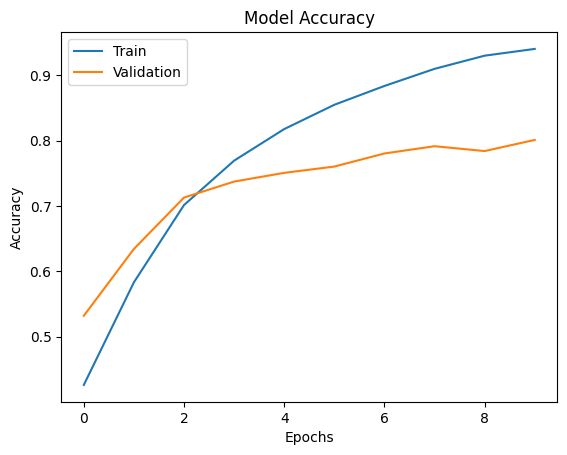

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import reuters
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
#Import the dataset
num_words = 10000
(x_train, y_train), (x_test, y_test)=reuters.load_data(num_words=num_words)
#Multi-hot-encoding of words
def vectorize(seqs, dim=num_words):
    res=np.zeros((len(seqs), dim), dtype="float32")
    for i, seq in enumerate(seqs):
        res[i, seq] = 1.0
    return res
x_train = vectorize(x_train)
x_test = vectorize(x_test)
#One-hot-encoding of words
y_train_oh = to_categorical(y_train)
y_test_oh = to_categorical(y_test)
#Model the network
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(num_words,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(46, activation='softmax')
])
model.compile(optimizer='adam',
              loss='categorical_crossentropy',metrics=['accuracy'])
#Train and evaluate the model
history=model.fit(x_train,
                  y_train_oh,
                  epochs=10,
                  batch_size=512,
                  validation_split=0.15)
test_loss, test_acc=model.evaluate(x_test, y_test_oh)
print(f"Test accuracy:{test_acc}")
print(f"Test loss:{test_loss}")
#Plot the graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('Model Accuracy.jpg')
plt.show()